## Understanding the Transformer

1. Data Preprocessing 
2. Model
3. etc

### 1. Data Preprocessing

In [1]:
import sys
sys.path.append('/home/pk21271/msciproject/bristol-tth-transformer-msc_project/bristol-tth-transformer-msc_project/src')
from preprocessing import *

path = "/cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL{year}_ml_inputs/{dataset}.parquet"

datasets = [
    'ttH_HToInvisible_M125',
    'TTToSemiLeptonic',
]

years = ['2018']

files = [
    path.format(year=year, dataset=dataset)
    for dataset in datasets
    for year in years
]

## Data preprocessing ##
df = load_from_parquet(files)   

2025-02-03 11:19:38,592 - INFO - Loading data from 2 parquet files...
2025-02-03 11:19:38,593 - INFO - Reading file: /cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/ttH_HToInvisible_M125.parquet
2025-02-03 11:19:50,144 - INFO - /cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/ttH_HToInvisible_M125.parquet contains 266650 events
2025-02-03 11:19:50,256 - INFO - Filtered df contains 144551 events from regions [0]
2025-02-03 11:19:50,454 - INFO - Reading file: /cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/TTToSemiLeptonic.parquet
2025-02-03 11:20:27,100 - INFO - /cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/TTToSemiLeptonic.parquet contains 2468208 events
2025-02-03 11:20:27,558 - INFO - Filtered df contains 437503 events from regions [0]
2025-02-03 11:20:30,163 - INFO - DataFrame loaded successfully with 582054 entries.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582054 entries, 0 to 2468207
Data columns (total 47 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   event                                      582054 non-null  uint64 
 1   region                                     582054 non-null  int32  
 2   Generator_weight                           582054 non-null  float32
 3   Generator_scalePDF                         582054 non-null  float32
 4   Generator_x1                               582054 non-null  float32
 5   Generator_x2                               582054 non-null  float32
 6   Generator_xpdf1                            582054 non-null  float32
 7   Generator_xpdf2                            582054 non-null  float32
 8   cleanedJet_pt                              582054 non-null  object 
 9   cleanedJet_eta                             582054 non-null  object 
 10  cleanedJet_p

In [3]:
df.describe()


,event,region,Generator_weight,Generator_scalePDF,Generator_x1,Generator_x2,Generator_xpdf1,Generator_xpdf2,InputMet_pt,InputMet_phi,ncleanedJet,ncleanedBJet,HT,MHT_pt,MHT_phi,weight_nominal,xs_weight,Pred
count,5.820540e+05,582054.0,582054.000000,582054.000000,582054.000000,582054.000000,582054.0,582054.0,582054.000000,582054.000000,582054.000000,582054.000000,582054.000000,582054.000000,582054.000000,5.820540e+05,5.820540e+05,582054.000000
mean,1.891719e+08,0.0,223.361618,156.501358,0.125897,0.126528,0.0,0.0,275.347290,0.090632,5.947771,1.677753,636.637695,277.087830,0.075261,4.542481e-07,5.897727e-07,0.438268
std,1.647319e+08,0.0,138.289032,138.366104,0.105920,0.106160,0.0,0.0,76.845116,1.757408,1.142200,0.659897,251.309052,76.166527,1.770001,3.440853e-07,3.200354e-07,0.228673
min,3.200000e+01,0.0,-303.359375,0.894440,0.003564,0.002585,0.0,0.0,200.125000,-3.140625,5.000000,1.000000,267.013062,200.000122,-3.141573,-2.685515e-06,-7.731120e-07,0.036702
25%,5.823806e+06,0.0,0.502533,60.654297,0.049160,0.049616,0.0,0.0,225.625000,-1.369141,5.000000,1.000000,469.341003,227.272560,-1.409650,1.313396e-07,8.747137e-08,0.250979
50%,1.679402e+08,0.0,303.359375,111.820312,0.093178,0.093723,0.0,0.0,252.125000,0.161743,6.000000,2.000000,572.433655,255.797363,0.135708,4.782974e-07,7.731120e-07,0.394042
75%,3.347099e+08,0.0,303.359375,209.226562,0.170044,0.170807,0.0,0.0,299.500000,1.564453,7.000000,2.000000,729.773590,301.436020,1.571372,6.715300e-07,7.731120e-07,0.593833
max,4.999998e+08,0.0,303.359375,2367.125000,0.955475,0.970032,0.0,0.0,1731.000000,3.140625,14.000000,7.000000,4760.846680,1669.724976,3.141572,5.862152e-06,7.731120e-07,0.992995


In [4]:
print(df["cleanedJet_btagDeepFlavB"])

0          [0.96777344, 0.9980469, 0.028625488, 0.0177307...
1          [0.6479492, 0.0045547485, 0.05001831, 0.006172...
2          [0.013267517, 0.9379883, 0.018295288, 0.038665...
4          [0.104003906, 0.005504608, 0.003545761, 0.0263...
5          [0.99658203, 0.19006348, 0.03161621, 0.0026378...
                                 ...                        
2468186    [0.009918213, 0.9536133, 0.015060425, 0.519042...
2468188    [0.07672119, 0.0017538071, 0.014953613, 0.0122...
2468189    [0.035949707, 0.08935547, 0.7246094, 0.9848633...
2468198    [0.0079956055, 0.96435547, 0.0029144287, 0.922...
2468207    [0.01197052, 0.002494812, 0.017730713, 0.10546...
Name: cleanedJet_btagDeepFlavB, Length: 582054, dtype: object


In [5]:
df = remove_negative_events(df) # This removes events with negative weight_nominals
df["target"] = create_target_labels(df["dataset"]) # This creates the target labels where 1 = ttH_HtoInvisible_M125 and 0 = other: will need to change this for multi classifcation
apply_reweighting_per_class(df) # This applies the reweighting to the dataset to balance the classes

reweighting = torch.Tensor(df['weight_training'].values) # Store the reweighting in a tensor, 

df["target"] = create_target_labels(df["dataset"])

2025-02-03 11:20:32,184 - INFO - Negative events = 7515 [1.29%]...
2025-02-03 11:20:32,637 - INFO - Negatively weighted events removed
2025-02-03 11:20:32,958 - INFO - Applying reweighting using variable: weight_nominal
2025-02-03 11:20:32,986 - INFO - Reweighting process '1' with factor: 58502108
2025-02-03 11:20:32,996 - INFO - Process '1' updated. Sum of 'weight_nominal': 0.00982, Sum of 'weight_training': 574539
2025-02-03 11:20:32,997 - INFO - Reweighting process '0' with factor: 2230937
2025-02-03 11:20:33,017 - INFO - Process '0' updated. Sum of 'weight_nominal': 0.25753, Sum of 'weight_training': 574539


In [6]:
df

,event,region,Generator_weight,Generator_scalePDF,Generator_x1,Generator_x2,Generator_xpdf1,Generator_xpdf2,cleanedJet_pt,cleanedJet_eta,...,cleanedJet_pt_jesBBEC1_2018_down,cleanedJet_pt_jesEC2_2018_up,cleanedJet_pt_jesEC2_2018_down,cleanedJet_pt_jesHF_2018_up,cleanedJet_pt_jesHF_2018_down,cleanedJet_pt_jesRelativeSample_2018_up,cleanedJet_pt_jesRelativeSample_2018_down,dataset,target,weight_training
0,10007,0,0.502533,57.710938,0.447632,0.037508,0.0,0.0,"[290.7155, 138.34459, 69.47663, 56.179237, 37....","[2.0585938, 0.041503906, 3.5195312, -0.6997070...",...,"[289.34915, 138.34459, 69.47663, 56.179237, 37...","[290.7155, 138.34459, 69.47663, 56.179237, 37....","[290.7155, 138.34459, 69.47663, 56.179237, 37....","[290.7155, 138.34459, 69.75255, 56.179237, 37....","[290.7155, 138.34459, 69.200714, 56.179237, 37...","[286.61172, 138.12717, 67.82309, 55.960033, 37...","[294.8193, 138.56201, 71.13017, 56.39844, 37.4...",ttH_HToInvisible_M125,1,4.930447
1,10016,0,0.502533,173.851562,0.149315,0.201553,0.0,0.0,"[239.0404, 210.66008, 132.35411, 106.52426, 55...","[-1.6025391, 1.1025391, 0.17651367, -0.9721679...",...,"[238.20978, 210.66008, 132.35411, 106.52426, 5...","[239.0404, 210.66008, 132.35411, 106.52426, 55...","[239.0404, 210.66008, 132.35411, 106.52426, 55...","[239.0404, 210.66008, 132.35411, 106.52426, 55...","[239.0404, 210.66008, 132.35411, 106.52426, 55...","[235.08452, 209.22025, 132.1339, 105.866234, 5...","[242.9963, 212.09991, 132.57431, 107.18229, 55...",ttH_HToInvisible_M125,1,1.803781
2,10024,0,0.502533,504.734375,0.076710,0.317383,0.0,0.0,"[380.8517, 224.78932, 154.46265, 96.40053, 45....","[-1.5244141, 0.58154297, -2.1484375, 0.5288086...",...,"[379.0325, 224.78932, 153.76756, 96.40053, 45....","[380.8517, 224.78932, 154.46265, 96.40053, 45....","[380.8517, 224.78932, 154.46265, 96.40053, 45....","[380.8517, 224.78932, 154.46265, 96.40053, 45....","[380.8517, 224.78932, 154.46265, 96.40053, 45....","[374.44452, 224.35515, 151.74278, 96.128555, 4...","[387.25888, 225.2235, 157.18251, 96.67251, 46....",ttH_HToInvisible_M125,1,5.624959
4,10122,0,0.502533,124.753906,0.022674,0.254684,0.0,0.0,"[196.01974, 162.0375, 117.88495, 45.982628, 36...","[-1.1425781, -0.7182617, -0.34155273, -2.73828...",...,"[196.01974, 162.0375, 117.88495, 45.840042, 36...","[196.01974, 162.0375, 117.88495, 46.911556, 36...","[196.01974, 162.0375, 117.88495, 45.0537, 36.2...","[196.01974, 162.0375, 117.88495, 45.982628, 36...","[196.01974, 162.0375, 117.88495, 45.982628, 36...","[194.59575, 161.6463, 117.57477, 45.1088, 35.2...","[197.44376, 162.4287, 118.19512, 46.856457, 37...",ttH_HToInvisible_M125,1,4.490662
5,10134,0,0.502533,170.421875,0.111679,0.232033,0.0,0.0,"[187.80313, 164.50815, 108.860596, 106.04323, ...","[-1.2480469, -1.8056641, 1.8857422, -0.3903808...",...,"[187.4628, 163.94958, 108.4925, 106.04323, 39....","[187.80313, 164.50815, 108.860596, 106.04323, ...","[187.80313, 164.50815, 108.860596, 106.04323, ...","[187.80313, 164.50815, 108.860596, 106.04323, ...","[187.80313, 164.50815, 108.860596, 106.04323, ...","[186.39185, 161.42079, 106.52953, 105.75723, 3...","[189.21442, 167.59549, 111.191666, 106.32922, ...",ttH_HToInvisible_M125,1,5.591726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468186,385274970,0,303.359375,105.398438,0.272751,0.282623,0.0,0.0,"[285.56168, 167.79526, 100.163925, 49.395924, ...","[0.0042915344, -0.3503418, -3.2714844, 2.63867...",...,"[285.56168, 167.79526, 100.163925, 49.250538, ...","[285.56168, 167.79526, 100.163925, 50.380817, ...","[285.56168, 167.79526, 100.163925, 48.41103, 4...","[285.56168, 167.79526, 100.44149, 49.395924, 4...","[285.56168, 167.79526, 99.88635, 49.395924, 48...","[285.53223, 167.41603, 97.108925, 48.48837, 46...","[285.59116, 168.17448, 103.218925, 50.30348, 4...",TTToSemiLeptonic,0,0.379873
2468188,385275163,0,303.359375,173.250000,0.152878,0.083569,0.0,0.0,"[228.95251, 107.94574, 34.69565, 30.844679, 30...","[1.25, -1.5703

In [7]:
# Now we deal with the awkward size jet arrays, these range in length from 5-14
# We pad them to a fixed length and convert them to tensors, this function uses multiprocessing to speed up the process

# First, seperate the array into chunks using split_dataframe()
# Then, apply the function to each chunk using process_chunk()
# ['pt','eta','phi','mass','area','btagDeepFlavB'] are the features/columns we want to keep
# Then is outputs the padded arrays and the target labels as tensors

X, y, pad_mask = awkward_to_inputs_parallel(df, n_processes=8, target_length=10) # Keeping first 10 jets


2025-02-03 11:20:34,575 - INFO - Converting awkward arrays to inputs [target_length=10]...


KeyboardInterrupt: 

In [7]:
# The X is a tensor with 10 columns, 1 for each jet in the events, and within each jet there are 6 features
# Missing values are padded with 0
# The y tensor is the target labels
# The pad_mask is a tensor with the same shape as X, with True where there is a value and False where there is a padding (no value)
print(X.shape)
print(y.shape)
print(pad_mask.shape)

torch.Size([574539, 10, 6])
torch.Size([574539, 1])
torch.Size([574539, 10])


In [8]:
event_level = get_event_level(df) 
# This retrieves the event-level features from the orignal dataframe. In this case-InputMet_pt which is sum of momenta aka missing momentum in the event

In [9]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

## Create training datasets ##
train_X, val_X, train_y, val_y, train_weights, val_weights, train_mask, val_mask, train_event, val_event = train_test_split(
    X, 
    y, 
    reweighting, 
    pad_mask, 
    event_level, 
    test_size=0.2,  
    random_state=42,
)

train_dataset = TensorDataset(train_X, train_y, train_weights, train_mask, train_event)
valid_dataset = TensorDataset(val_X, val_y, val_weights, val_mask, val_event)

## Create loaders ##
batch_size = 1024

train_loader = DataLoader(
    dataset = train_dataset, 
    batch_size = batch_size, 
    shuffle = True, 
)
valid_loader = DataLoader(
    dataset = valid_dataset, 
    batch_size = 10000, # can use larger batches for the GPU 
    shuffle = False, 
    #num_workers = 20,
)
# NOTE : in a jupyter notebook it is not possible to use `num_workers` dues to multiprocessing issues.
# Use this notebook for testing and experimenting, but to benefit from multiprocessing batch loading, you will need the python scripts


In [10]:
print(train_X.shape)
train_X_p = train_X.permute(0,2,1)
print(train_X_p.shape)

torch.Size([459631, 10, 6])
torch.Size([459631, 6, 10])


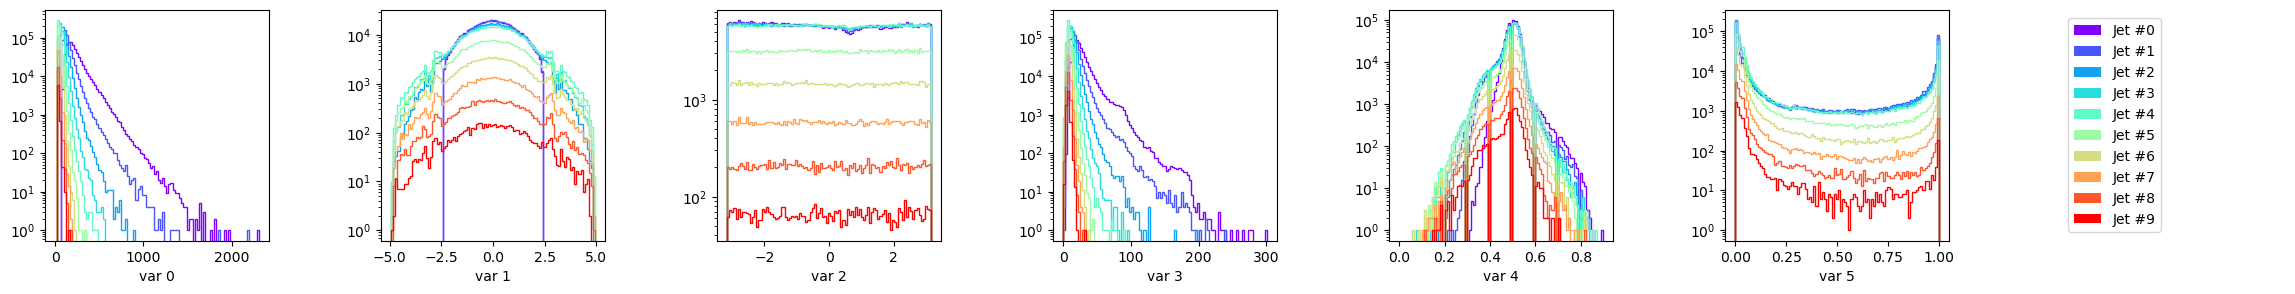

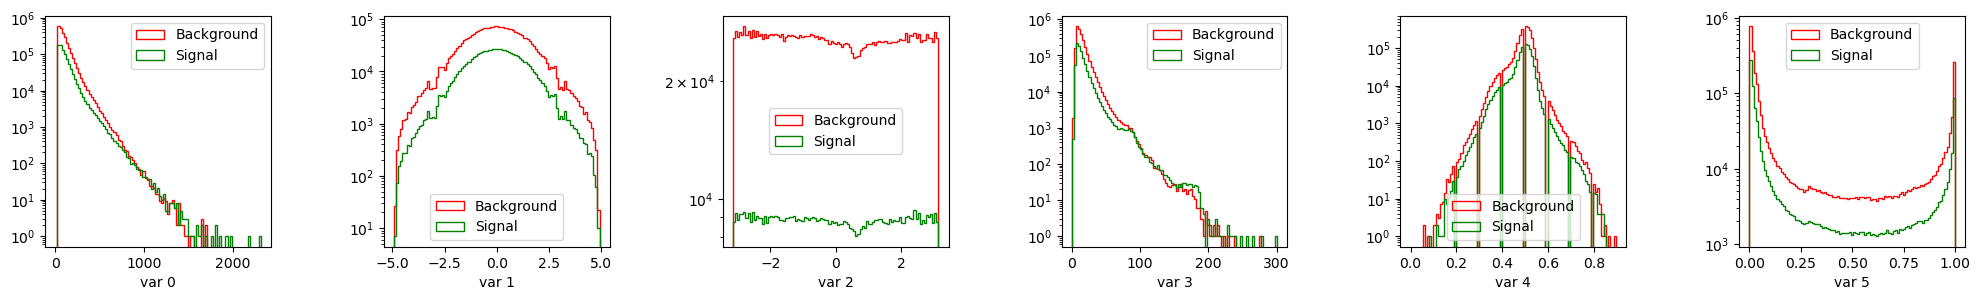

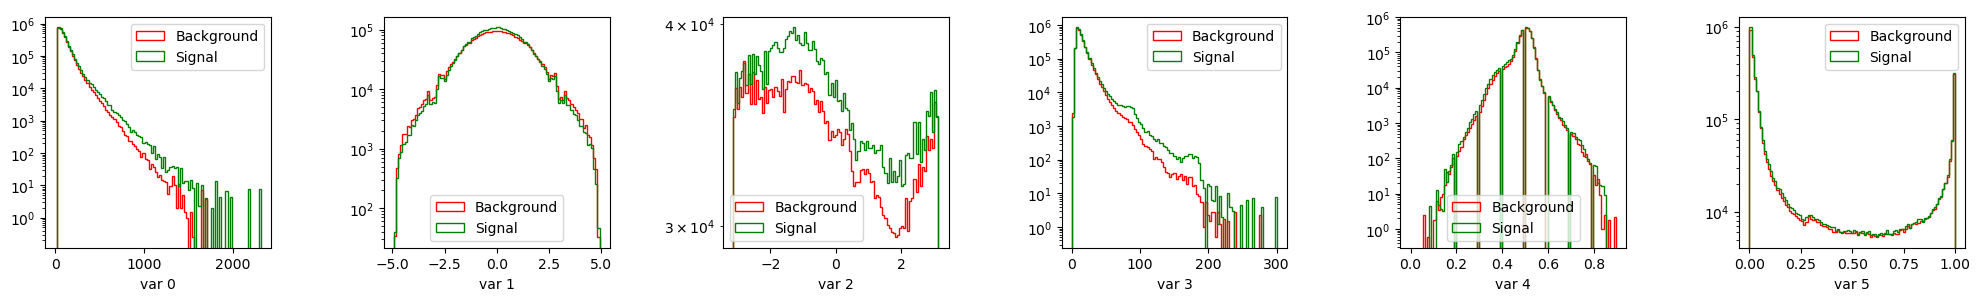

In [11]:
from plotting import *

# We now plot all the jets, then the background vs signal, then the background vs signal with reweighting
fig = plot_inputs_per_multiplicity(X,y,pad_mask,bins=100,log=True,show=True)
fig = plot_inputs_per_label(X,y,pad_mask,bins=100,log=True,show=True)
fig = plot_inputs_per_label(X,y,pad_mask,bins=100,weights=reweighting,log=True,show=True)

(array([8.44834616e-04, 9.96879328e-04, 1.07701579e-03, 9.08449850e-04,
        7.85569595e-04, 7.06734969e-04, 6.34027650e-04, 5.35820753e-04,
        4.67363160e-04, 4.07999568e-04, 3.48462829e-04, 2.94418769e-04,
        2.57079885e-04, 2.12998237e-04, 1.87175234e-04, 1.55171134e-04,
        1.34670486e-04, 1.17406144e-04, 1.00663263e-04, 8.44781381e-05,
        6.74773006e-05, 6.58447887e-05, 5.34091095e-05, 4.93923818e-05,
        4.30344112e-05, 3.41925315e-05, 2.82606595e-05, 2.63109142e-05,
        2.41417143e-05, 2.24420563e-05, 1.87151571e-05, 1.40199403e-05,
        1.12400798e-05, 1.08273424e-05, 1.13808135e-05, 7.46347653e-06,
        9.43261519e-06, 6.76021329e-06, 7.32991162e-06, 6.87808565e-06,
        5.60105312e-06, 3.74899841e-06, 4.45834131e-06, 3.24399662e-06,
        3.39348070e-06, 2.79508424e-06, 2.36480380e-06, 1.71696149e-06,
        1.40373112e-06, 1.78846627e-06, 1.05266844e-06, 1.49034291e-06,
        7.59552388e-07, 4.29113208e-07, 1.56464701e-06, 6.721062

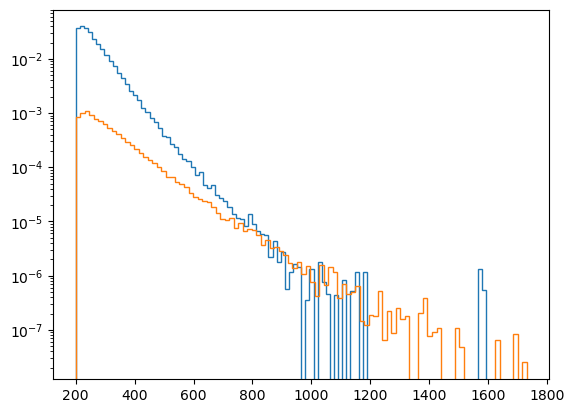

In [15]:
# Print distributions of InputMet_pt with weight nominal

plt.hist(df["InputMet_pt"][df["target"] == 0], bins=100, weights=df["weight_nominal"][df["target"] == 0], histtype='step', label='nominal', log=True)
plt.hist(df["InputMet_pt"][df["target"] == 1], bins=100, weights=df["weight_nominal"][df["target"] == 1], histtype='step', label='nominal', log=True)

## 2. MODEL

Transformer architecture
1. embedding layer
2. encoder block (3)
3. class block (3)
4. dnn layers (3) Gelu-Gelu-Sigmoid

In [12]:
# Now we look at the embedding method in the transformer.py file 

from transformer import AnalysisObjectTransformer, Embedding

# Embedding features into higher dimension using Embedding() class
# This is a neural network based embedding technique. def __init__(self, input_dim, embed_dims, normalize_input=True, activation=nn.GELU)
# Starts with linear layer mapping input_dims=6 to embed_dims=64 by default, we can use any number of embed_dims eg [32,64,128] layers

# Does it somehow embed the 10 jets 6 features into a higher dimension space? So 6x10 features to 64? Why not just flatten?
# Test performance differnce to flatten method 

print(X.shape) 

torch.Size([574539, 10, 6])


### Embedding

In [13]:
# Exploring the embedding method class
import torch.nn as nn
 
class Embedding(nn.Module):
    def __init__(self, input_dim, embed_dims, normalize_input=True, activation=nn.GELU):
        # In the transformer class we say that 
        # input_dim = train_X.shape[-1],   # Which is 6 as shape = (batch, 10, 6)
        # embed_dims = [64], 

        super().__init__()
        if not isinstance(embed_dims,(tuple,list)):
            embed_dims = [embed_dims]
        assert len(embed_dims) >= 1

        self.input_bn = nn.BatchNorm1d(input_dim) if normalize_input else None

        layers = [
            nn.Linear(input_dim,embed_dims[0]),
            activation(),
        ]
        for dim_in,dim_out in zip(embed_dims[:-1],embed_dims[1:]):
            layers.append(nn.Linear(dim_in,dim_out))
            layers.append(activation()) 
        self.layers = nn.Sequential(*layers)

        self.dim = embed_dims[-1]

    def forward(self, x):
        if self.input_bn is not None:
            # x: (batch, seq_len, embed_dim)
            # batch norm expects (batch, embed_dim, sequence length)
            x = self.input_bn(x.permute(0,2,1).contiguous()).permute(0,2,1).contiguous()

        return self.layers(x)
    
x = torch.randn(5,10,6) # batch x jets x features
print(x.shape)
embedding = Embedding(input_dim=6, embed_dims=[64])
x_new = embedding(x)
print(x_new.shape) # Dont quite understand the point of embedding features that contain all the data to higher dimension space

torch.Size([5, 10, 6])
torch.Size([5, 10, 64])


### Attention Blocks

In [14]:
class AttBlock(nn.Module):
    def __init__(self, embed_dim, expansion_factor=2, num_heads=8, activation=nn.GELU, dropout=0):
        super(AttBlock, self).__init__()

        self.num_heads = num_heads
        self.layer_norm1 = nn.LayerNorm(embed_dim)
        self.multihead_attention = nn.MultiheadAttention(
            embed_dim = embed_dim,
            num_heads = num_heads,
            dropout = dropout,
            batch_first = True,
        )
        self.layer_norm2 = nn.LayerNorm(embed_dim) # Each normalisation layer has learnable parameters so we need differnent one between steps
        self.layer_norm3 = nn.LayerNorm(embed_dim)
        self.linear1 = nn.Linear(embed_dim, embed_dim * expansion_factor)
        self.activation = activation()
        self.layer_norm4 = nn.LayerNorm(embed_dim * expansion_factor)
        self.linear2 = nn.Linear(embed_dim * expansion_factor, embed_dim)

    def forward(self, x, x_cls=None, padding_mask=None, attn_mask=None):
        # Class token provided -> concat to do the class attention #
        if x_cls is not None:
            x = torch.cat((x_cls, x), dim=1)  # (batch, seq_len+1, embed_dim) This adds a class token to the input sequence (extra jet almost)
            if padding_mask is not None:
                # Need to add mask=False for cls token
                padding_mask = torch.concat(
                    (
                        torch.full((padding_mask.shape[0],1),fill_value=False).to(x.device),
                        padding_mask,
                    ),
                    dim = 1,
                )
        # Layer normalization 1
        x = self.layer_norm1(x)
        # Multihead Attention
        if attn_mask is not None:
            # Ensure mask has the correct shape for attention
            # Repeat for each head
            attn_mask = attn_mask.repeat(self.num_heads,1,1)
        if x_cls is not None:
            x_att, _ = self.multihead_attention(x_cls, x, x, key_padding_mask=padding_mask, attn_mask=attn_mask) # if class then, query = class token
        else:
            x_att, _ = self.multihead_attention(x, x, x, key_padding_mask=padding_mask, attn_mask=attn_mask)
        # Layer normalization 2
        x_att = self.layer_norm2(x_att)
        # Skip connection
        if x_cls is not None:
            x = x_cls + x_att # Skip connection
        else:
            x = x + x_att
        # Layer normalization 3
        x = self.layer_norm3(x)
        # Linear layer 1 #
        x_linear = self.activation(self.linear1(x))
        # Layer normalization 4
        x_linear = self.layer_norm4(x_linear)
        # Linear layer 2
        x_linear = self.linear2(x_linear)
        # Final skip connection #
        x = x + x_linear
        return x

## Looking at data for W multiclass

In [1]:
import torch
x_multi = torch.load('/home/pk21271/prep_data/ttH_ttbar_Zjets/X.pt')
y_multi = torch.load('/home/pk21271/prep_data/ttH_ttbar_Zjets/y.pt')
pad_mask = torch.load('/home/pk21271/prep_data/ttH_ttbar_Zjets/pad_mask.pt')
reweighting = torch.load('/home/pk21271/prep_data/ttH_ttbar_Zjets/reweighting.pt')
event_level = torch.load('/home/pk21271/prep_data/ttH_ttbar_Zjets/event_level.pt')

/tmp/ipykernel_1595166/3999156448.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_multi = torch.load('/home/pk21271/prep_data/ttH_ttbar_Zjets/X.pt')
/tmp/ipykernel_159

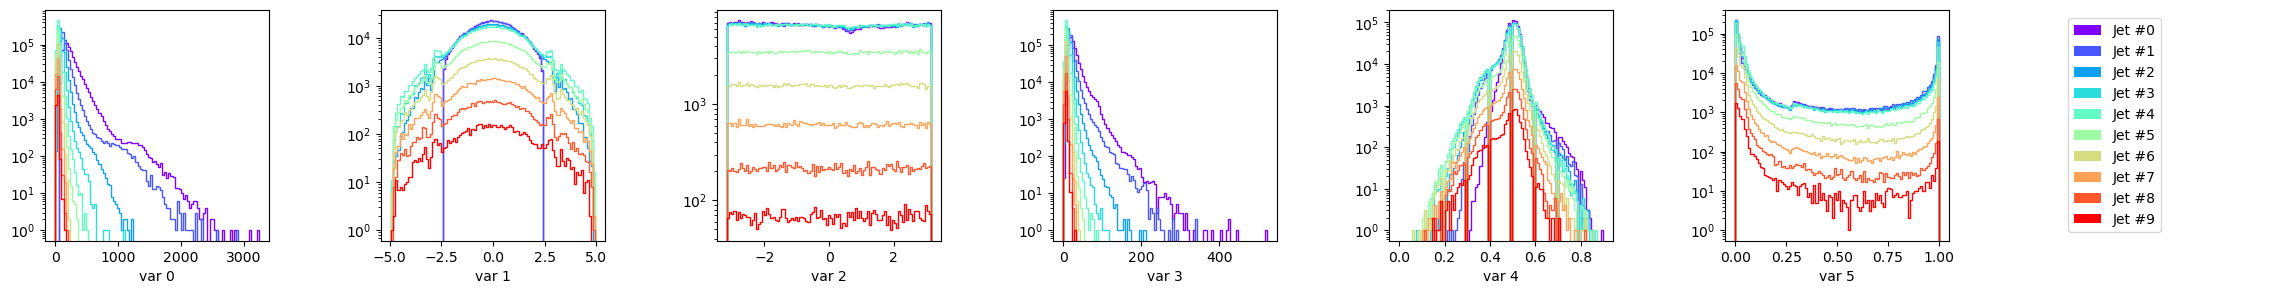

In [64]:
import sys
sys.path.append('/home/pk21271/msciproject/bristol-tth-transformer-msc_project/bristol-tth-transformer-msc_project/src')

from plotting import plot_inputs_per_multiplicity
from plotting import plot_inputs_per_label_multi

fig = plot_inputs_per_multiplicity(x_multi,y_multi, pad_mask, bins = 100, log=True,show=True)
# fig = plot_inputs_per_label_multi(x_multi,y_multi, pad_mask, bins = 100, log=True,show=True)

In [59]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def plot_inputs_per_label(inputs, labels, mask, bins, weights=None, log=False, outdir=None, show=False, density=False):
    batch_size, n_parts, n_vars = inputs.shape  # Extract shape: (batch, 10, 6)

    if weights is not None:
        weights = weights.unsqueeze(-1).expand(-1, n_parts)  # Expand weights to match particles

    fig, axs = plt.subplots(ncols=n_vars, figsize=(4 * n_vars, 3))
    plt.subplots_adjust(left=0.1, right=0.9, wspace=0.5)

    # Convert one-hot labels to class indices (0, 1, 2)
    labels = torch.argmax(labels, dim=1)  # Shape: [batch_size]

    # Define class names and colors
    class_labels = {
        0: ("ttH", "r"),    # Red for ttH
        1: ("ttbar", "b"),  # Blue for ttbar
        2: ("Zjets", "g")   # Green for Zjets
    }

    for i in range(n_vars):  # Iterate over features (6 total)
        bins_var = np.linspace(inputs[..., i].min().item(), inputs[..., i].max().item(), bins)

        for class_idx, (class_name, color) in class_labels.items():
            mask_class = (labels == class_idx)[:, None].expand(-1, n_parts)  # Shape: [batch_size, 10]
            valid_mask = mask_class & mask  # Ensure mask aligns with inputs

            # Apply the corrected mask along the right dimension
            selected_inputs = inputs[:, :, i][valid_mask]  # Masked selection

            axs[i].hist(
                selected_inputs,  # Now applying mask along particles, keeping features correct
                bins=bins_var,
                histtype="step",
                color=color,
                label=class_name,
                weights=weights[valid_mask] if weights is not None else None,
                density=density,
            )

        axs[i].set_xlabel(f'Feature {i}')
        if log:
            axs[i].set_yscale('log')
        axs[i].legend()

    if outdir is not None:
        plt.savefig(f"{outdir}/inputs_per_class.png", dpi=300)
    if show:
        plt.show()

    return fig


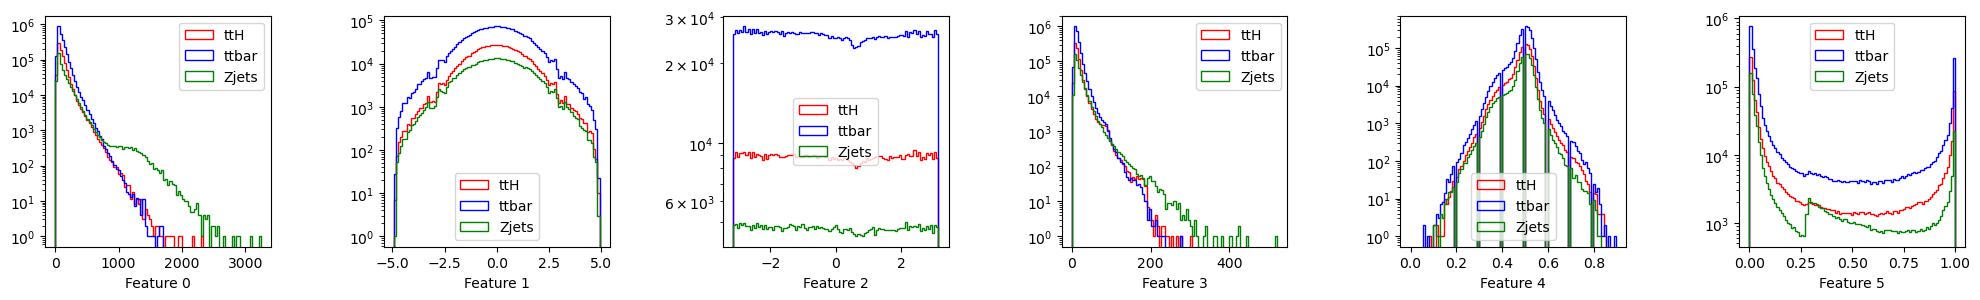

In [60]:
fig = plot_inputs_per_label(x_multi, y_multi, pad_mask, bins=100, log=True, show=True)

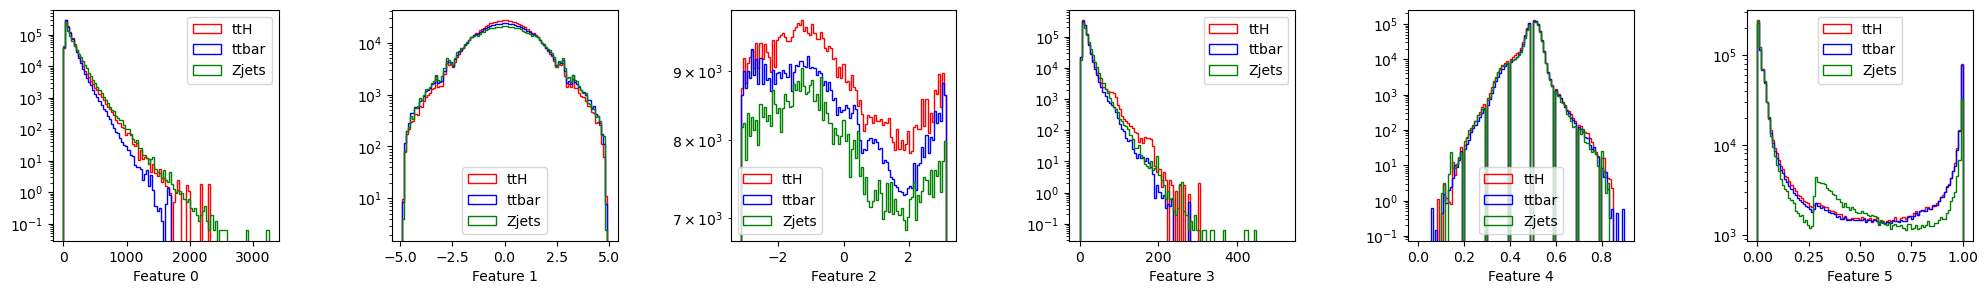

In [63]:
fig = plot_inputs_per_label(x_multi, y_multi, pad_mask, weights=reweighting, bins=100, log=True, show=True)

In [62]:
reweighting

tensor([1.2153, 0.4446, 1.3865,  ..., 0.0327, 0.0458, 0.0194])

In [26]:
reweighting2 = torch.load('/home/pk21271/prep_data/ttH_ttbar/reweighting.pt')
reweighting3 = torch.load('/home/pk21271/prep_data/ttH_Zjets/reweighting.pt')

/tmp/ipykernel_1442257/1068330190.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  reweighting2 = torch.load('/home/pk21271/prep_data/ttH_ttbar/reweighting.pt')
/tmp/ipyk

In [25]:
reweighting2

tensor([4.9304, 1.8038, 5.6250,  ..., 2.3188, 0.9154, 1.3157])

In [ ]:
reweighting3

In [39]:
# Combine y multi and reweighting tensors

reweighting_conc = reweighting.unsqueeze(-1)
y_multi_conc = torch.cat((y_multi, reweighting_conc), dim=1)


y_multi_conc

In [44]:
# Sum up the reweighting values for each class

reweighting_sum = torch.sum(y_multi_conc, dim=0)
print(reweighting_sum)


tensor([141615.0000, 432924.0000,  84299.0000, 658837.9375])


In [56]:
from preprocessing import plot_weights

plot_weights()

In [ ]:
y_multi

# Looking at Regions in the raw data

Noticed that the number of events are signigfcanlty fewer when only keep region 0

In [ ]:
import sys
sys.path.append('/home/pk21271/msciproject/bristol-tth-transformer-msc_project/bristol-tth-transformer-msc_project/src')

path_src = './src'
if path_src not in sys.path:
    sys.path.insert(0,path_src)

from preprocessing import *
import pandas as pd


path = "/cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/ttH_HToInvisible_M125.parquet"
path = "/cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/TTToSemiLeptonic.parquet"

df = pd.read_parquet(path)

df

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2124850/1419616081.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(mu, color='k', linestyle='dashed', label='Mean ($\mu$)')
/tmp/ipykernel_2124850/1419616081.py:28: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Normal Distribution ($\pm 5\sigma$ range)')


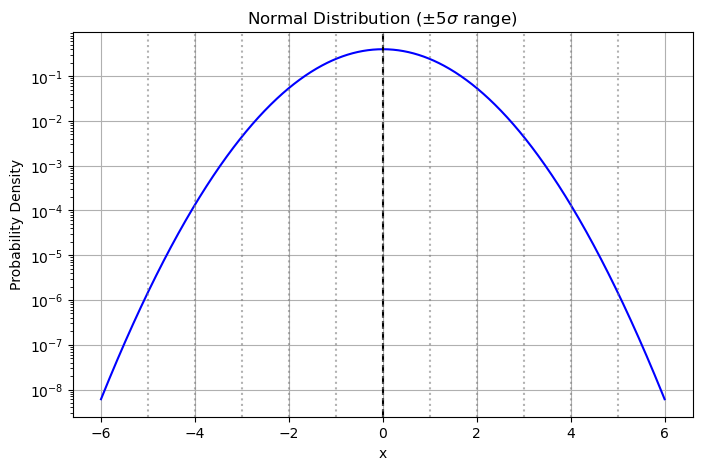

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define mean and standard deviation
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate x values from -5σ to +5σ
x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)

# Compute the normal distribution
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'Normal Distribution ($\mu=0$, $\sigma=1$)', color='b')
plt.axvline(mu, color='k', linestyle='dashed', label='Mean ($\mu$)')

# Add sigma lines
sigmas = np.arange(-5, 6, 1)
for s in sigmas:
    plt.axvline(mu + s*sigma, color='gray', linestyle='dotted', alpha=0.6)

# Labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution ($\pm 5\sigma$ range)')
# plt.legend()
plt.grid(True)

# Show the plot
plt.yscale('log')
# plt.xscale('log')
plt.show()


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2124850/1525446285.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(mu, color='k', linestyle='dashed', label='Mean ($\mu$)')
/tmp/ipykernel_2124850/1525446285.py:28: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Normal Distribution ($\pm 5\sigma$ range)')


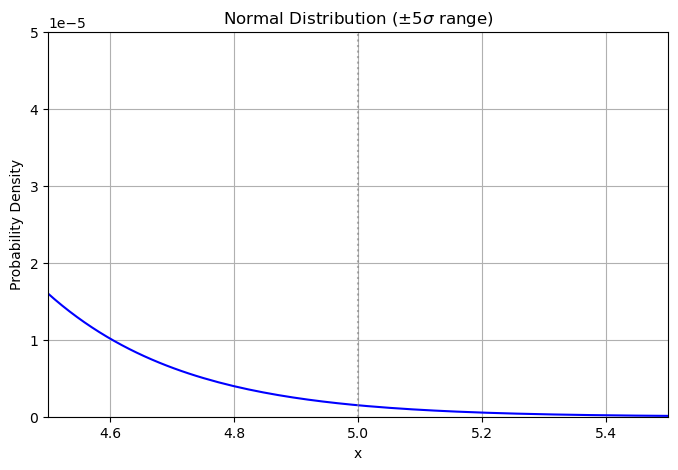

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define mean and standard deviation
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate x values from -5σ to +5σ
x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)

# Compute the normal distribution
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'Normal Distribution ($\mu=0$, $\sigma=1$)', color='b')
plt.axvline(mu, color='k', linestyle='dashed', label='Mean ($\mu$)')

# Add sigma lines
sigmas = np.arange(-5, 6, 1)
for s in sigmas:
    plt.axvline(mu + s*sigma, color='gray', linestyle='dotted', alpha=0.6)

# Labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution ($\pm 5\sigma$ range)')
# plt.legend()
plt.grid(True)

# Show the plot
# plt.yscale('log')
plt.xlim(4.5,5.5)
plt.ylim(0,0.00005)
plt.show()


<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:72: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
<>:96: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:72: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
<>:96: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2124850/3498308425.py:32: SyntaxWarning: invalid escape sequence '\s'
  label='5$\sigma$ threshold' if sigma == 5 else None)
/tmp/ipykernel_2124850/3498308425.py:36: Syn

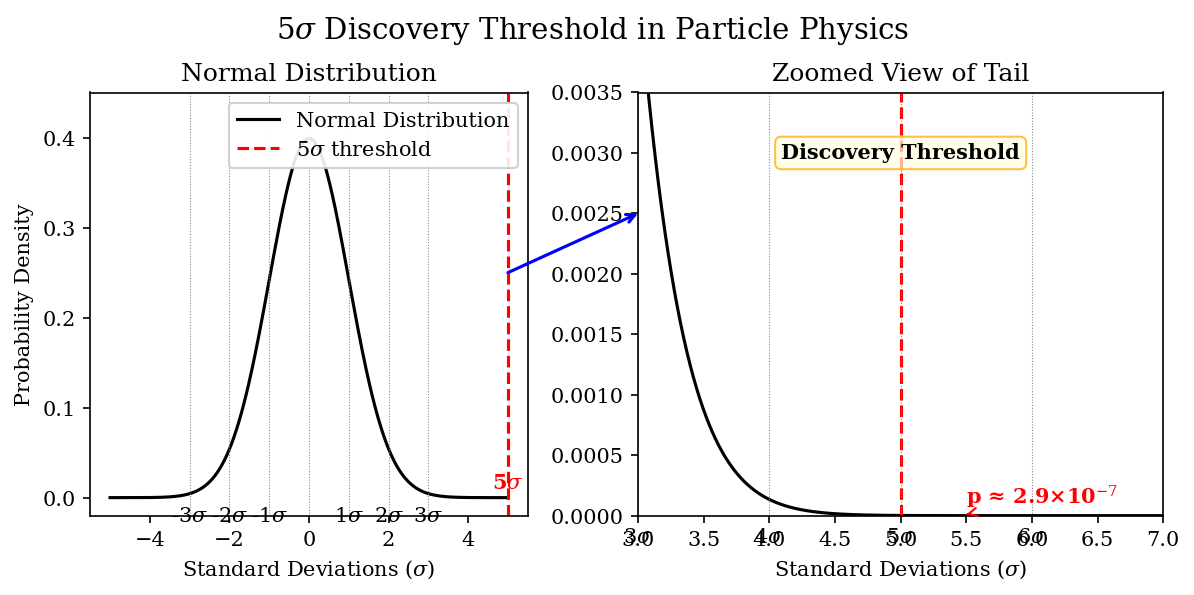

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.gridspec as gridspec
from matplotlib import patches

# Set the font to be more scientific publication friendly
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'text.usetex': False,  # Set to True if you have LaTeX installed
    'mathtext.fontset': 'dejavuserif'
})

# Create figure with custom layout
fig = plt.figure(figsize=(8, 4), dpi=150)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2])

# First subplot - Full normal distribution
ax1 = plt.subplot(gs[0])
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x)

# Plot normal distribution
ax1.plot(x, y, 'k-', linewidth=1.5, label='Normal Distribution')
ax1.fill_between(x, y, where=(x <= -5) | (x >= 5), color='red', alpha=0.3)

# Add vertical lines for sigma values
for sigma in [-3, -2, -1, 0, 1, 2, 3]:
    if sigma == 5 or sigma == -5:
        ax1.axvline(x=sigma, linestyle='--', color='red', linewidth=1.5, 
                   label='5$\sigma$ threshold' if sigma == 5 else None)
    else:
        ax1.axvline(x=sigma, linestyle=':', color='gray', linewidth=0.5)
        if sigma != 0:
            ax1.text(sigma, -0.01, f'{sigma}$\sigma$', ha='center', va='top')

# Highlight 5 sigma area
ax1.axvline(x=5, linestyle='--', color='red', linewidth=1.5, label='5$\sigma$ threshold')
ax1.text(5, 0.01, '5$\sigma$', ha='center', color='red', fontweight='bold')

# Set axis labels and limits
ax1.set_xlim(-5.5, 5.5)
ax1.set_ylim(-0.02, 0.45)
ax1.set_xlabel('Standard Deviations ($\sigma$)')
ax1.set_ylabel('Probability Density')
ax1.set_title('Normal Distribution')

# Second subplot - Zoomed in view on the tail
ax2 = plt.subplot(gs[1])
x_zoom = np.linspace(3, 7, 1000)
y_zoom = norm.pdf(x_zoom)

# Plot zoomed distribution
ax2.plot(x_zoom, y_zoom, 'k-', linewidth=1.5)
ax2.fill_between(x_zoom, y_zoom, where=(x_zoom >= 5), color='red', alpha=0.3)

# Add vertical line for 5 sigma
ax2.axvline(x=5, linestyle='--', color='red', linewidth=1.5)

# Add annotation for p-value
ax2.annotate('p ≈ 2.9×10$^{-7}$', 
             xy=(5.5, 0.00001), 
             xytext=(5.5, 0.0001),
             arrowprops=dict(arrowstyle="->", color='red'),
             color='red',
             fontweight='bold')

# Set axis labels and limits
ax2.set_xlim(3, 7)
ax2.set_ylim(0, 0.0035)
ax2.set_xlabel('Standard Deviations ($\sigma$)')
ax2.set_title('Zoomed View of Tail')

# Add sigma markers on x-axis
for sigma in [3, 4, 5, 6]:
    ax2.axvline(x=sigma, linestyle=':', color='gray', linewidth=0.5)
    ax2.text(sigma, -0.0001, f'{sigma}$\sigma$', ha='center', va='top')

# Add discovery threshold label
ax2.text(5, 0.003, 'Discovery Threshold', 
         ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", fc='lightyellow', ec="orange", alpha=0.7),
         fontweight='bold')

# Connect the plots with an arrow
con = patches.ConnectionPatch(xyA=(5, 0.25), xyB=(3, 0.0025), 
                             coordsA="data", coordsB="data",
                             axesA=ax1, axesB=ax2, 
                             arrowstyle="->", linewidth=1.5,
                             color='blue')
fig.add_artist(con)

# Adjust layout and add a title
plt.tight_layout()
fig.suptitle('5$\sigma$ Discovery Threshold in Particle Physics', fontsize=14, y=0.98)
plt.subplots_adjust(top=0.85)

# Add legend
ax1.legend(loc='upper right', framealpha=0.9)

plt.savefig('five_sigma_threshold.png', dpi=300, bbox_inches='tight')
plt.show()